In [1]:
data <- read.csv("ehailshare.csv")

head(data, n = 5)

id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952608,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
4bd23055-6827-41c6-b23b-3c491f24e74d,1543284024,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
981a3613-77af-4620-a42a-0c0866077d1e,1543366822,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553583,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [2]:
dim(data)

[1] 693071     57

In [3]:
sum(duplicated(data))

[1] 0

In [4]:
# Return columns with nulls
null_columns <- colnames(data)[colSums(is.na(data)) > 0]
print(null_columns)

[1] "price"


In [5]:
# Calculate the mean of the 'price' column
mean_price <- mean(data$price, na.rm = TRUE)
mean_price <- round(mean_price)

# Replace missing values with the mean
data$price[is.na(data$price)] <- mean_price

print(mean_price)

[1] 17


In [6]:
table(data$cab_type)


  Lyft   Uber 
307408 385663 

In [7]:
table(data$name)


       Black    Black SUV          Lux    Lux Black Lux Black XL         Lyft 
       55095        55096        51235        51235        51235        51235 
     Lyft XL       Shared         Taxi     UberPool        UberX       UberXL 
       51235        51233        55095        55091        55094        55096 
         WAV 
       55096 

In [8]:
# Convert 'datetime' column to date-time format
data$datetime <- as.POSIXct(data$datetime)

# Extract year from 'datetime' column
data$Year <- format(data$datetime, "%Y")

# Display the first few rows of the data frame
head(data)


id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Year
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952608,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,2018
4bd23055-6827-41c6-b23b-3c491f24e74d,1543284024,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,2018
981a3613-77af-4620-a42a-0c0866077d1e,1543366822,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,2018
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553583,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,2018
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,2018
f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1545071112,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400,2018


Warning message in par(aspect.ratio = 1):
“"aspect.ratio" is not a graphical parameter”

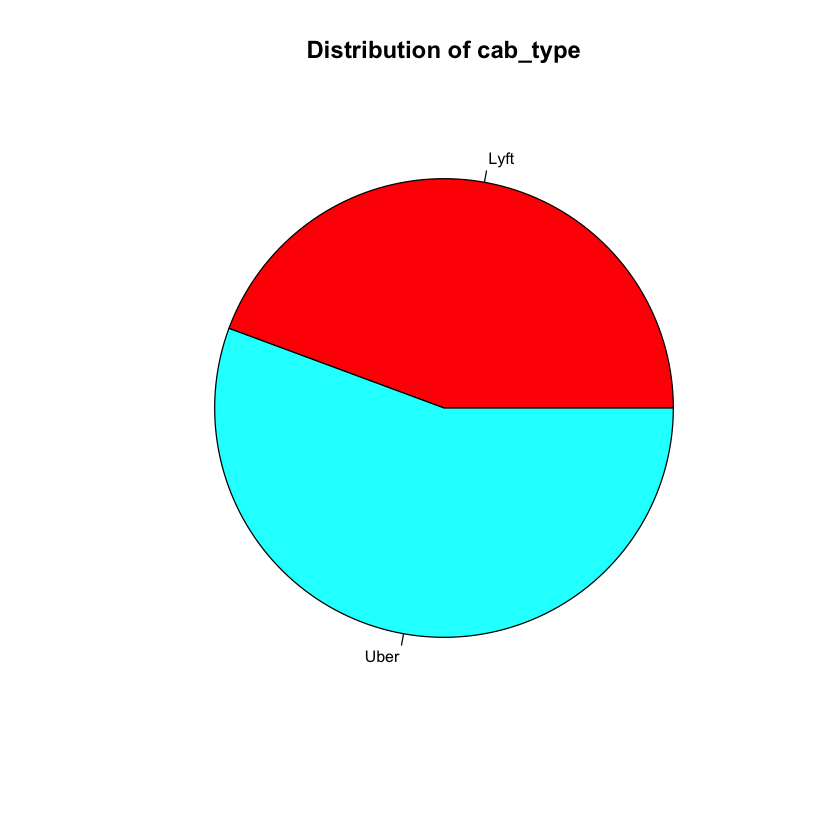

In [13]:
# Calculate the distribution of 'cab_type'
distribution <- table(data$cab_type)

# Plot a pie chart of the distribution
pie(distribution, labels = names(distribution), main = 'Distribution of cab_type', 
    col = rainbow(length(distribution)), cex = 0.8)

# Set the aspect ratio to be equal
par(aspect.ratio = 1)

# Display the chart

Warning message in par(aspect.ratio = 1):
“"aspect.ratio" is not a graphical parameter”

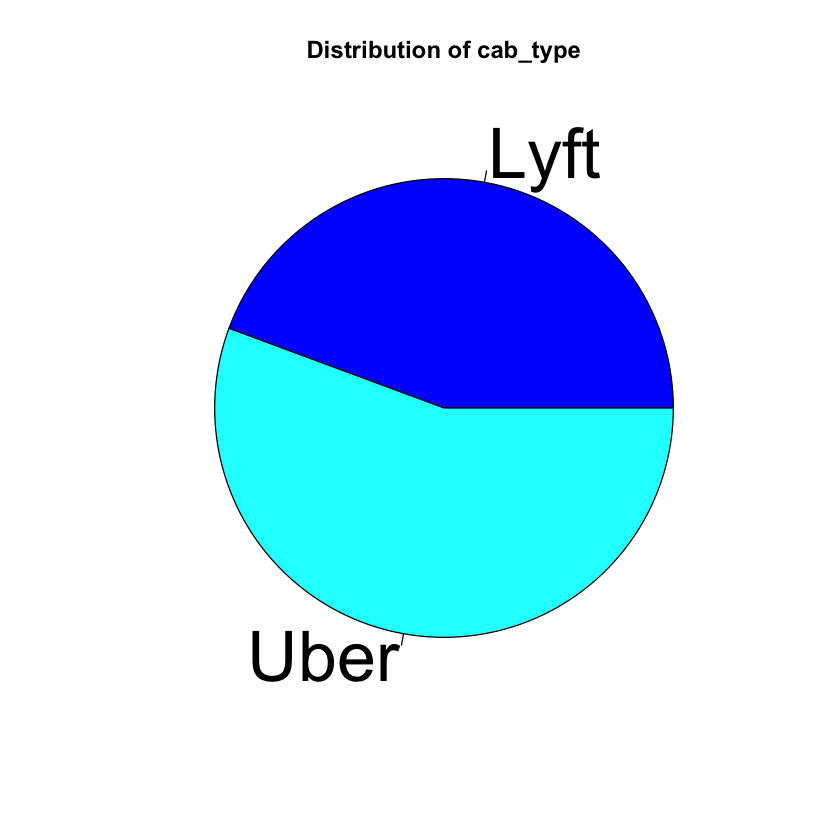

In [16]:
# Calculate the distribution of 'cab_type'
distribution <- table(data$cab_type)

# Define custom colors
colors <- c("#0000FF","#00FFFF")

# Plot a pie chart of the distribution with custom colors and size
pie(distribution, labels = names(distribution), main = 'Distribution of cab_type', 
    col = colors, cex = 3.5)

# Set the aspect ratio to be equal
par(aspect.ratio = 1)

# Display the chart


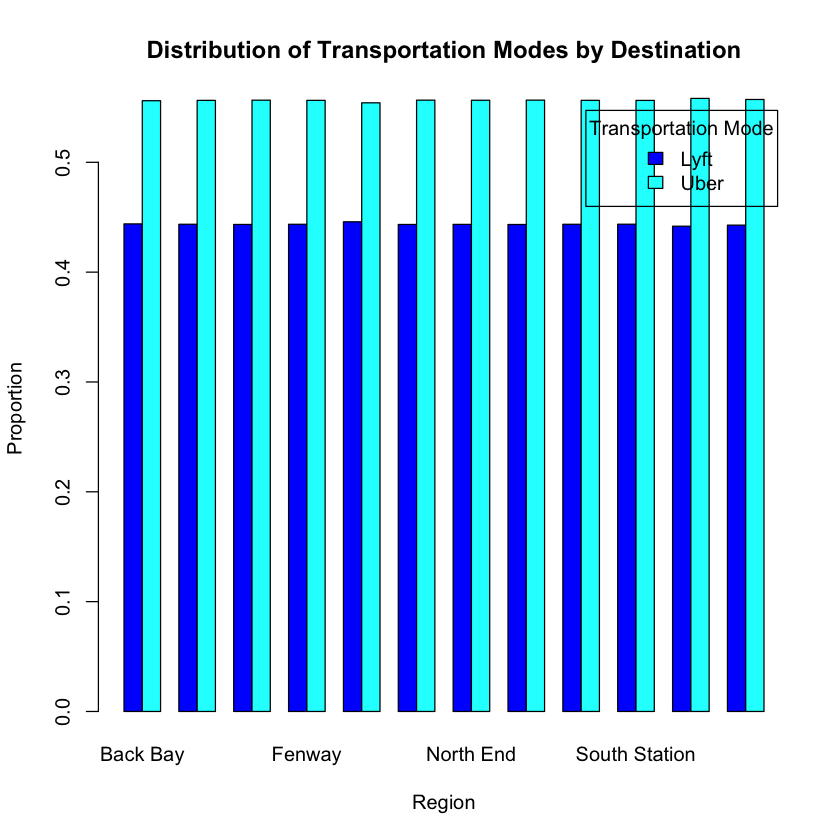

In [21]:
# Define a custom color palette
my_colors <- c("#0000FF","#00FFFF")

# Plot a stacked bar graph with custom colors
barplot(t(grouped_data), beside = TRUE, legend.text = TRUE, args.legend = list(title = 'Transportation Mode'),
        xlab = 'Region', ylab = 'Proportion', main = 'Distribution of Transportation Modes by Destination',
        col = my_colors)

# Display the plot


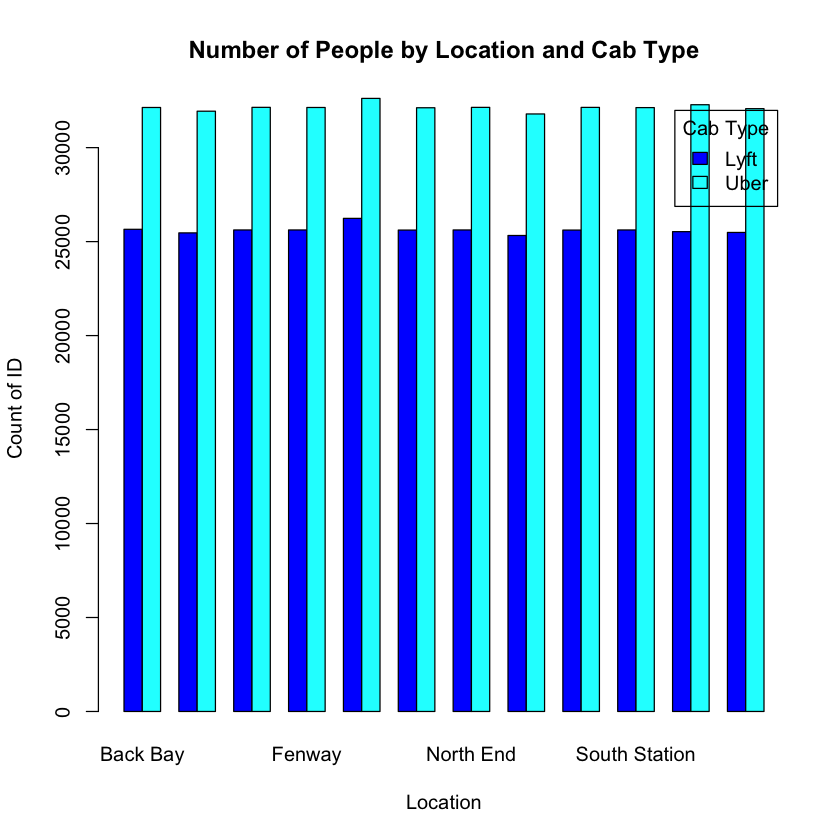

In [24]:
# Group the data by 'source' and 'cab_type', and count the number of unique 'ID' values
grouped_data <- table(data$cab_type, data$source)

# Define a custom color palette
my_colors <- c("#0000FF", "#00FFFF")

# Plot a stacked bar graph with custom colors
barplot(grouped_data, beside = TRUE, legend.text = TRUE, args.legend = list(title = 'Cab Type'),
        xlab = 'Location', ylab = 'Count of ID', main = 'Number of People by Location and Cab Type',
        col = my_colors)

# Display the plot


In [25]:
# Load the required library
library(ggplot2)

# Group the data by the 'hour' column and calculate the count of each mode choice within each time group
time_grouped <- table(data$hour, data$cab_type)

# Convert the table to a data frame
time_grouped <- as.data.frame.matrix(time_grouped)

# Reshape the data frame to long format
time_grouped <- tidyr::pivot_longer(time_grouped, cols = everything(), names_to = "cab_type", values_to = "count")

# Convert the 'hour' column to numeric
time_grouped$hour <- as.numeric(as.character(time_grouped$hour))

# Plot the mode choices over time using line plots
ggplot(data = time_grouped, aes(x = hour, y = count, color = cab_type)) +
  geom_line() +
  geom_point() +
  xlab("Hour") +
  ylab("Count") +
  ggtitle("Mode Choices Over Time") +
  theme_minimal()


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error: 'pivot_longer' is not an exported object from 'namespace:tidyr'


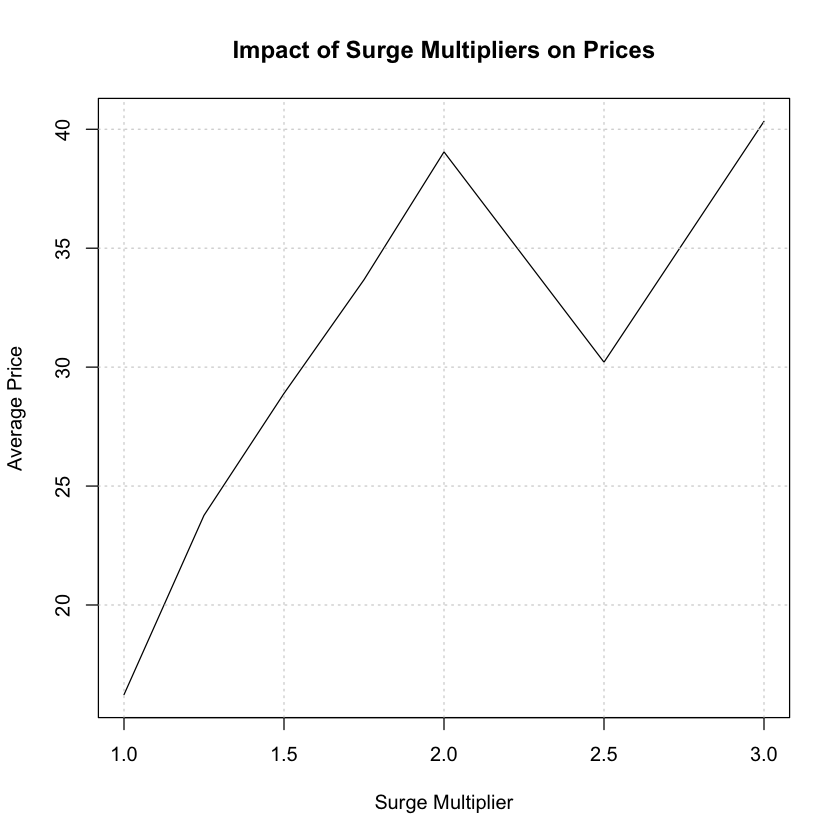

In [27]:
# Group the data by surge multipliers and calculate the average price for each surge multiplier
average_prices <- aggregate(price ~ surge_multiplier, data, mean)

# Plot a line graph
plot(average_prices$surge_multiplier, average_prices$price, type = "l", xlab = "Surge Multiplier", ylab = "Average Price",
     main = "Impact of Surge Multipliers on Prices")
grid()

# Display the plot


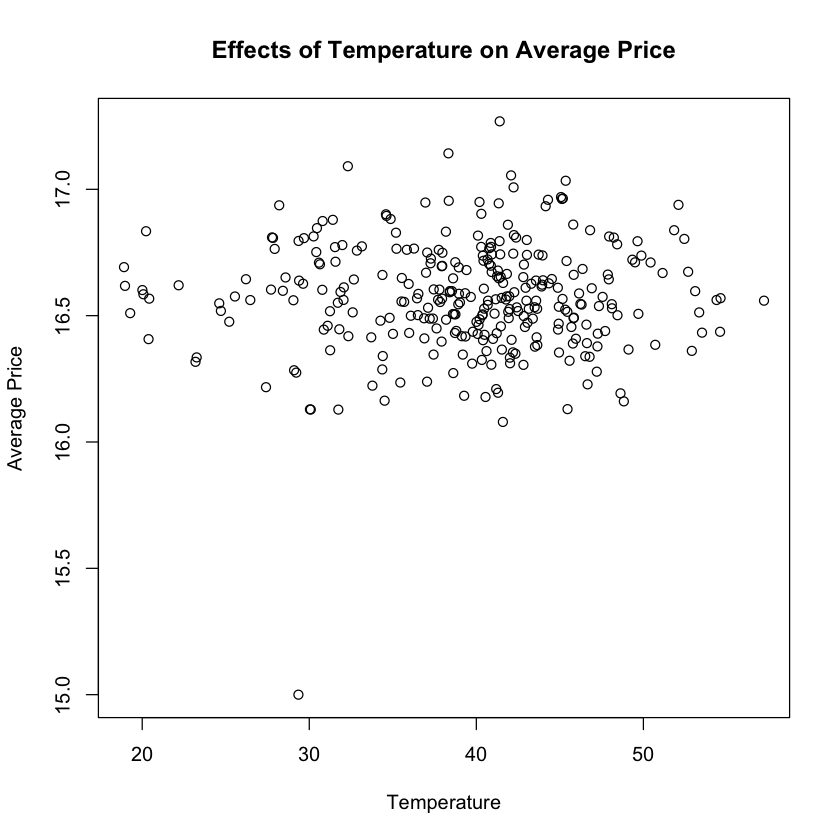

In [28]:
# Calculate the average price for each temperature
average_prices <- aggregate(price ~ temperature, data, mean)

# Plot a scatter plot
plot(average_prices$temperature, average_prices$price, xlab = "Temperature", ylab = "Average Price",
     main = "Effects of Temperature on Average Price")

# Display the plot


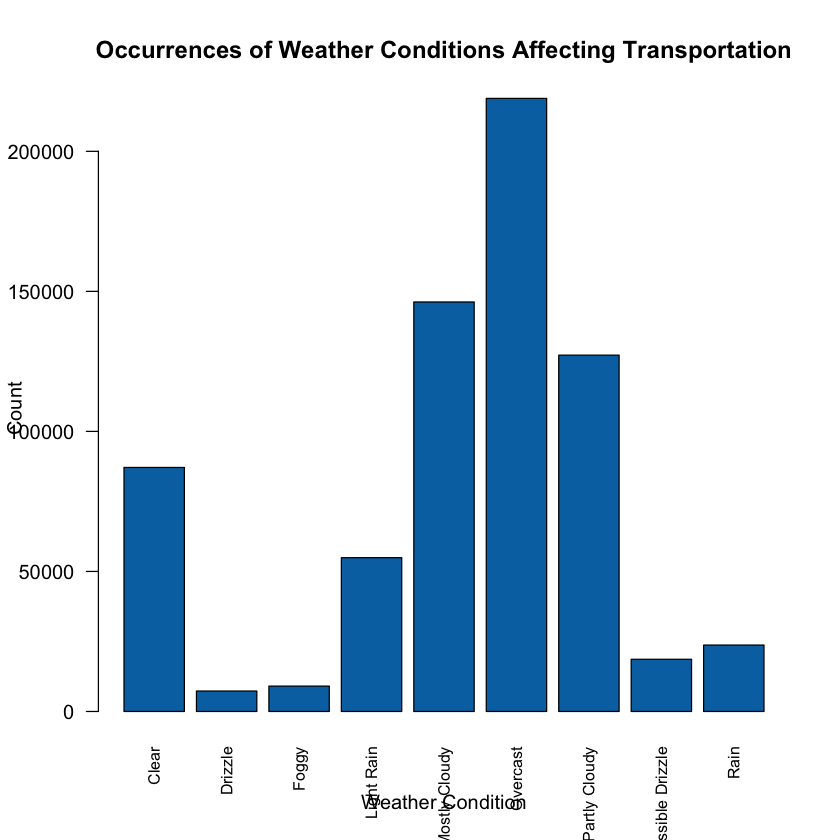

In [30]:
# Filter the data for rows where events or weather conditions are mentioned
affected_data <- data[!is.na(data$short_summary) | !is.na(data$name), ]

# Calculate the counts of weather conditions
weather_counts <- table(affected_data$short_summary)

# Define a color palette
colors <- c("#0072B2")

# Plot a bar plot for weather conditions with colors
barplot(weather_counts, main = "Occurrences of Weather Conditions Affecting Transportation",
        xlab = "Weather Condition", ylab = "Count", cex.names = 0.8, las = 2, col = colors)
